## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#загрузка датафрейма и вывод информации
games_basic = pd.read_csv('/datasets/games.csv')
display(games_basic)
games_basic.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#создаем копию исходных данных, чтобы была возможность к ним вернуться
games = games_basic.copy()
display(games)
print()
print('Пропуски')
games.isna().sum()#находим пропуски

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



Пропуски


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
#проверяем наличие дубликатов
print('Дубликаты')
games.duplicated().sum()

Дубликаты


0

- В наименовании столбцов содержатся буквы в разных регистрах, для удобства далее приведем их к нижнему регистру.
- Так как в столбцах Name и Year_of_Release имеется мало пропусков относительно всех данных и корректно их заполнить нет возможности, мы можем удалить эти строки. Со столбцами Other_sales, User_Score, Rating так сделать нельзя, т.к. пропусков слишком много. Пропуски будут заменены на известные нам значения отличные от представленных в этих столбцах, таким образом удобно будет их отфильтровывать.
- Необходимо привести форматы столбцов User_Score и Year_of_Release к корректным.

### Подготовка данных

In [5]:
games.columns = games.columns.str.lower()#замена заглавий столбцов на строчные буквы
games = games.dropna(subset=['name'])#удаление пропусков в столбце name
games[games['year_of_release'].isna()]#просмотр пропусков в солбце с годами релиза

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
games = games.dropna(subset = ['year_of_release'])#удаление пропусков в столбце year_of_release
print(games.shape)#проверяем количество оставшихся строк

(16444, 11)


In [7]:
games['user_score'].unique()#уникальные значения столбца User_Score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
0.7       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [9]:
display(games.query('user_score == "tbd"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [9]:
games[games['user_score'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


В столбце есть пропуски и значение tbd. tbd является аббревиатурой фразы "будет определена", таким образом данные значения можно также принять за пропуски. Так как пропусков достаточно много, заменим их на значение "-1" - заглушку, для удобстав в дальнейшей работе.

Также стоит обратить внимание, что в большинстве своем отсутствуют данные в столбцах с оценками критиков, пользователей и рейтингом, для игр, выпущенных для непопулярных в Северной Америке площадках. Это можно объяснить тем, что рейтинговое агенство ESRB, данные которого представлены в нашем исследовании, расположено в Северной Америке и ведет свою деятельность на территории США и Канады.

In [10]:
#замена пропусков и строк с tbd на заглушку
games.loc[games['user_score'] == 'tbd', 'user_score'] = '-1'
games['user_score'] = games['user_score'].fillna(-1)

In [11]:
#уникальные значения столбца critic_score
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В столбце есть большое количество пропусков, заменим их на заглушку "-1". Некорректных значений больше нет

In [12]:
games['critic_score'] = games['critic_score'].fillna(-1)

In [13]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Столбец содержит большое количество пропусков, заменим их на значение-заглушку "nd"

In [14]:
games['rating'] = games['rating'].fillna('nd')
games['rating'].value_counts()

nd      6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [15]:
games['year_of_release'] = games['year_of_release'].astype(int, errors='ignore')
games['user_score'] = pd.to_numeric(games['user_score'])
display(games)
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,nd
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,nd
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,nd
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,nd
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,nd
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,nd


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Заменили формат столбца user_score на float, а столбца year_of_release на int

In [16]:
#проверка на пропуски после обработки
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

После произведенной обработки данных пропуски отсутствуют, форматы столбцов корректны. Можно проводить исследование по представленным данным.

In [17]:
#добавим столбец с общими продажами
games['total_sales'] = (
    games[['na_sales','eu_sales','jp_sales', 'other_sales']]
    .sum(axis='columns')
    )
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,nd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,nd,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,nd,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,nd,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,nd,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,nd,0.01


## Исследовательский анализ данных

### Количество игр, выпускавшихся в разные годы

In [18]:
games_year = games.groupby(['year_of_release']).agg({'name': 'count'})
display(games_year)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


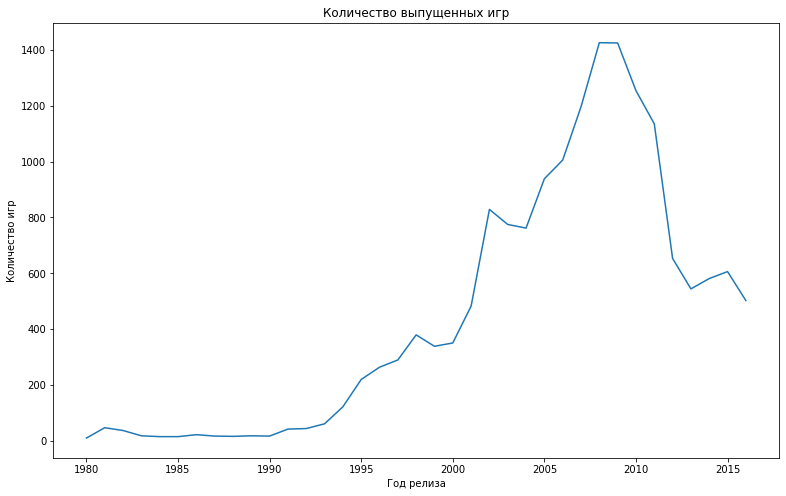

In [19]:
plt.figure(figsize=(13,8))
(sns.lineplot(data=games_year, x = games_year.index, y = 'name'))
plt.title('Количество выпущенных игр')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

Некоторые игры могли быть выпущены в один год, но для разных площадок. Удалим дубликаты по наименованиям и года и исследуем полученый график.

In [20]:
games.duplicated(subset=['name', 'year_of_release']).sum()#подсчет дубликатов

4249

In [21]:
#удаление дубликатов и проверка на корректность числа оставшихся строк
games_name = games.drop_duplicates(subset=['name', 'year_of_release'])
print(games_name.shape)

(12195, 12)


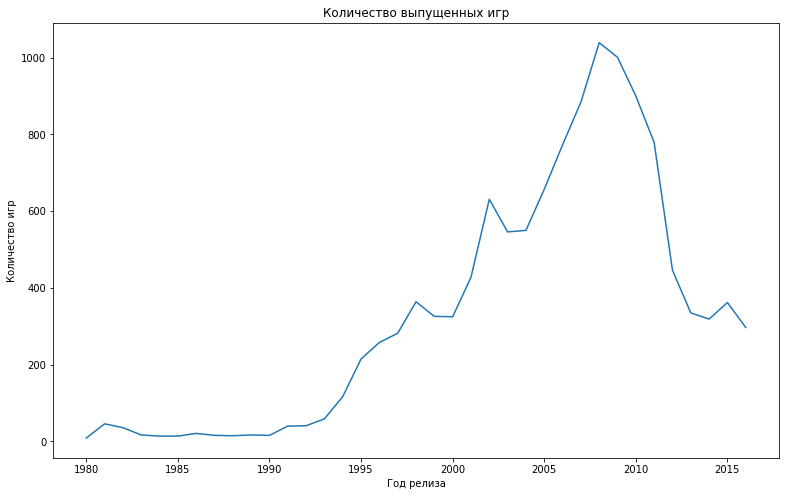

In [22]:
games_year_new = games_name.groupby(['year_of_release']).agg({'name': 'count'})
plt.figure(figsize=(13,8))
(sns.lineplot(data=games_year_new, x = games_year_new.index, y = 'name'))
plt.title('Количество выпущенных игр')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

График без дубликатов получился более сглаженный, но все пики и провалы остались прежние.

До 1994 года выпускалось мало игр, далее их количество значительно росло до 2008 года, после чего начался спад. К 2016 году количество выпускаемых игр опустилость до периода 2001-2002 года.
Периоды роста и спада не были постоянными. В 1998 и 2003 были пики, после которых виден некий спад. Также в 2014-2015 мы видим небольшой рост в глобальном периоде спада.

### Исследование зависимости продаж от платформ

In [23]:
games_platform = (
    games
    .groupby('platform')
    .agg({'total_sales': 'sum'})
    .sort_values(by='total_sales', ascending=False)
    )
display(games_platform)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


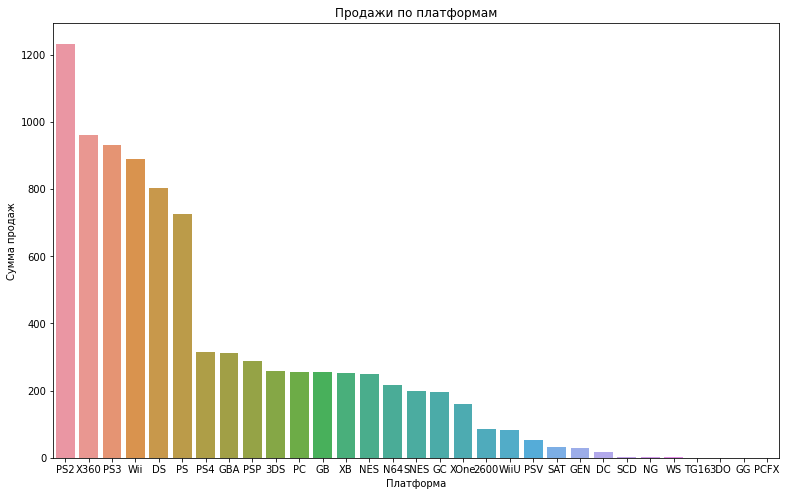

In [24]:
plt.figure(figsize=(13,8))
(sns.barplot(data=games_platform, x = games_platform.index, y = 'total_sales'))
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

Платформами, имеющими наибольшее количество продаж, являются PS2, X360, PS3, Wii, PS, DS. Затем идет платформа PS4 с уровнем продаж в 2 раза меньше DS.

In [25]:
#таблица с топ-6 игр
games_top = games_platform.index[0:6]
games_platform_top = games.query('platform in @games_top')
display(games_platform_top)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,-1.0,-1.0,nd,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,-1.0,-1.0,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1.0,-1.0,nd,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,nd,0.01


In [26]:
games_platform_top['platform'].unique()#проверка платформ в получившейся таблице

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS'], dtype=object)

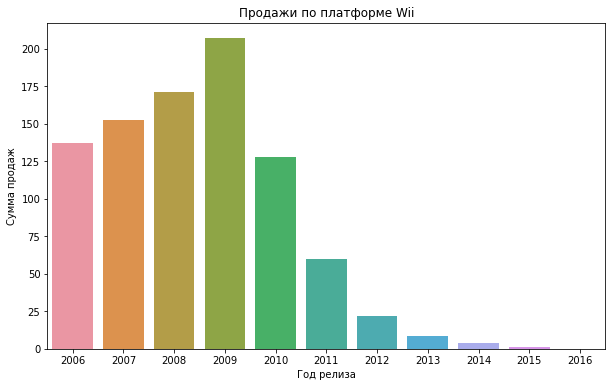

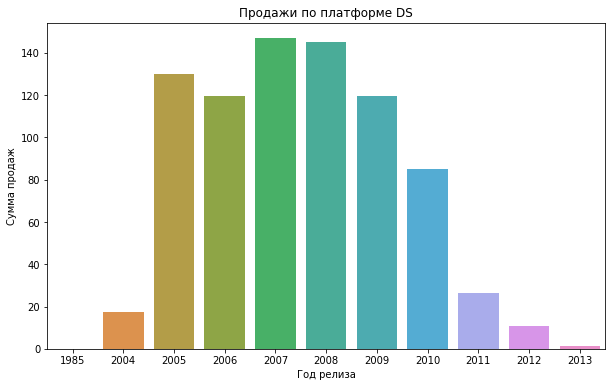

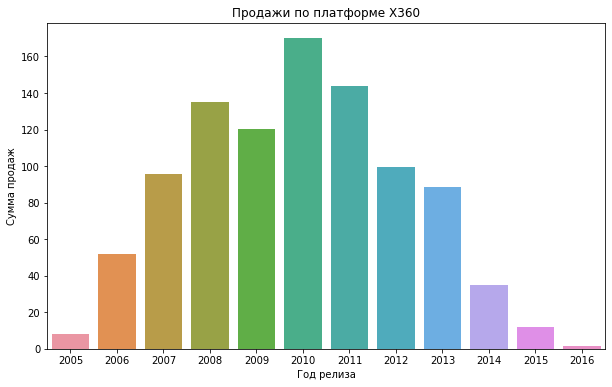

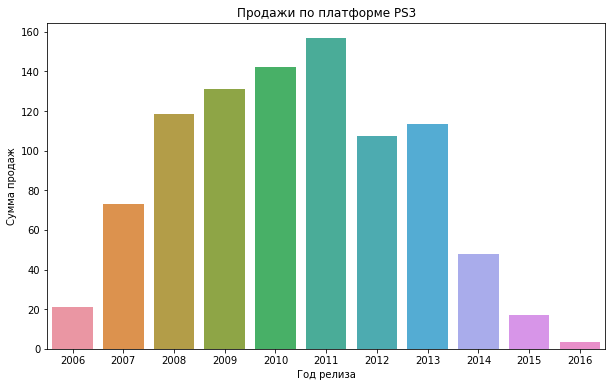

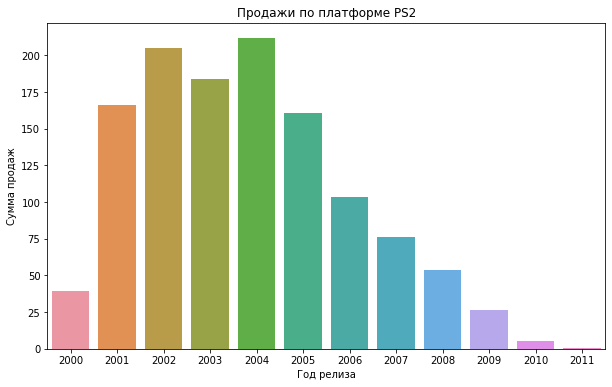

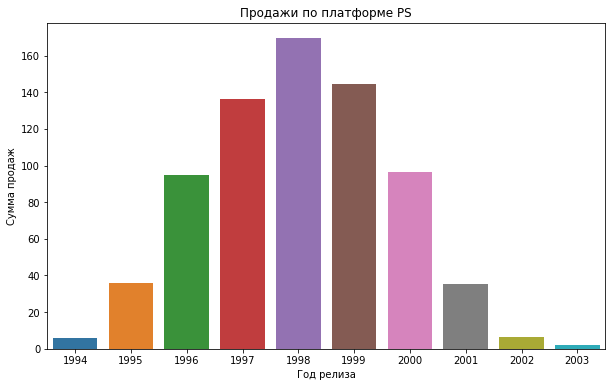

In [27]:
#графики продаж для топ-6 платформ по годам
for platform in games_platform_top['platform'].unique():
    platform_new = (
        games_platform_top
        .query('platform == @platform')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    )
    plt.figure(figsize=(10,6))
    (sns.barplot(data=platform_new, x = platform_new.index, y='total_sales'))
    plt.title(f'Продажи по платформе {platform}')
    plt.xlabel('Год релиза')
    plt.ylabel('Сумма продаж')
    plt.show()

Из полученных графиков можно сделать вывод, что средний период жизни платформы составляет около 10 лет. Но при этом игровая индустрия является быстроразвивающейся, но рынке появляются новые платформы, период роста продаж по платформе составляет примерно 3 года. Поэтому за актуальный период ля дальнейшего построения прогноза на 2017 год возьмем 3 года.

### Продажи по платформ за период с 2014г по 2016г

In [28]:
#создаем новую таблицу за актуальный период
games_with2014 = games.query('year_of_release >= 2014')

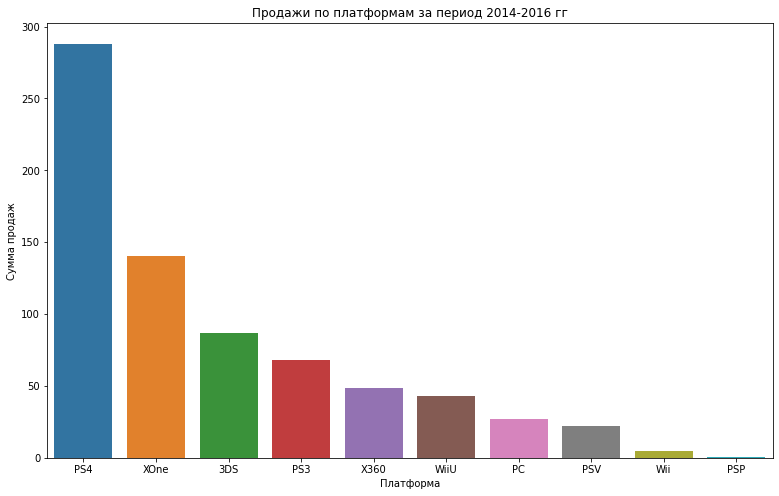

In [29]:
platform_total = (
    games_with2014
    .pivot_table(index='platform', values='total_sales', aggfunc=sum)
    .sort_values(by='total_sales', ascending = False)
    )
plt.figure(figsize=(13,8))
(sns.barplot(data=platform_total, x = platform_total.index, y = 'total_sales'))
plt.title('Продажи по платформам за период 2014-2016 гг')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

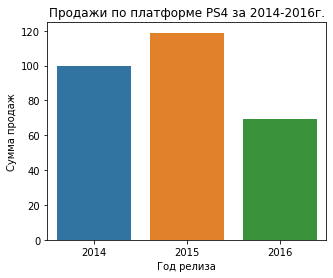

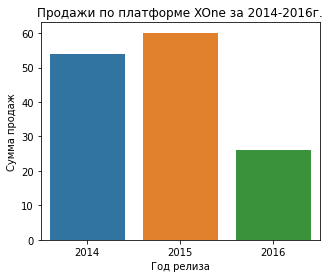

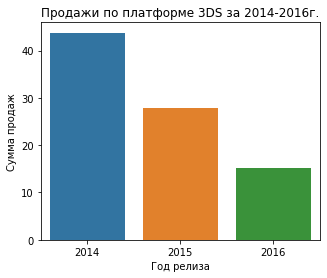

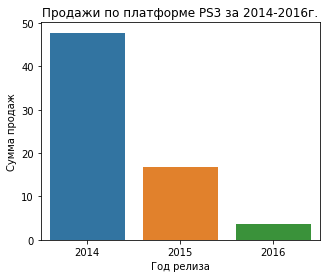

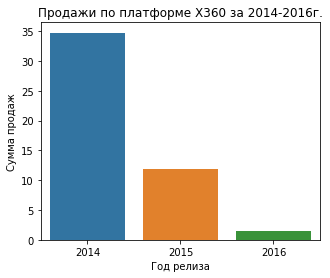

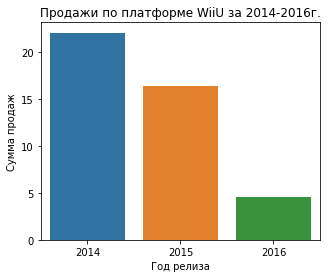

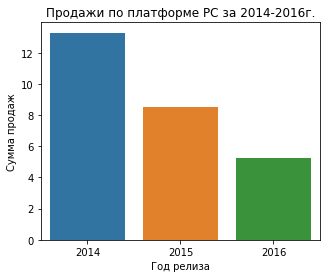

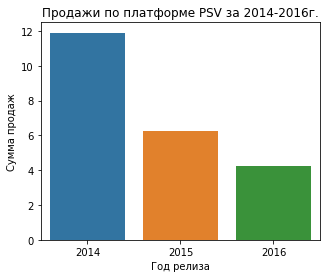

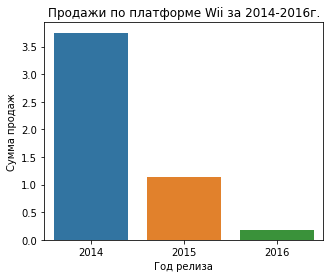

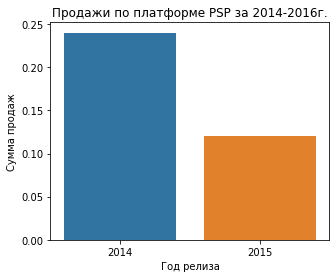

In [30]:
#графики продаж для каждой платформы по года
for platform in platform_total.index:
    platform_new = (
        games_with2014
        .query('platform == @platform')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    )
    plt.figure(figsize=(5,4))
    (sns.barplot(data=platform_new, x = platform_new.index, y='total_sales'))
    plt.title(f'Продажи по платформе {platform} за 2014-2016г.')
    plt.xlabel('Год релиза')
    plt.ylabel('Сумма продаж')
    plt.show()

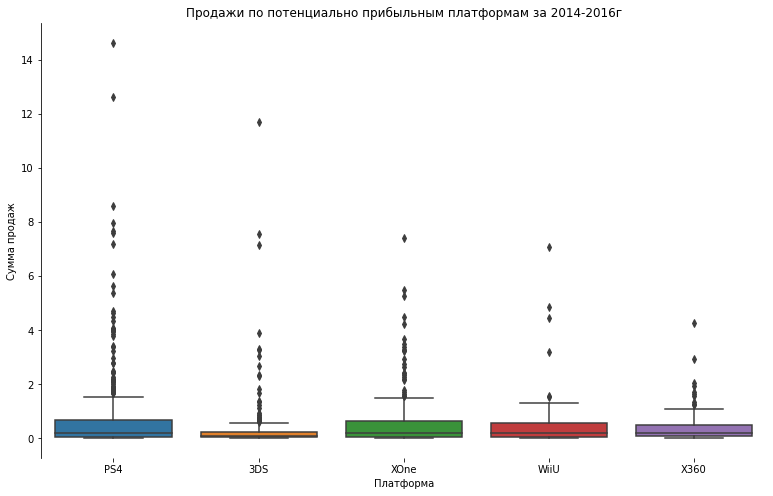

In [31]:
#построение графиков для оценки продаж
platform_popular = games_with2014.query('platform in ["PS4", "3DS", "XOne", "WiiU", "X360"]')
plt.figure(figsize=(13,8))
sns.boxplot(data=platform_popular, x = 'platform', y = 'total_sales')
sns.despine(bottom=True)
plt.title('Продажи по потенциально прибыльным платформам за 2014-2016г')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

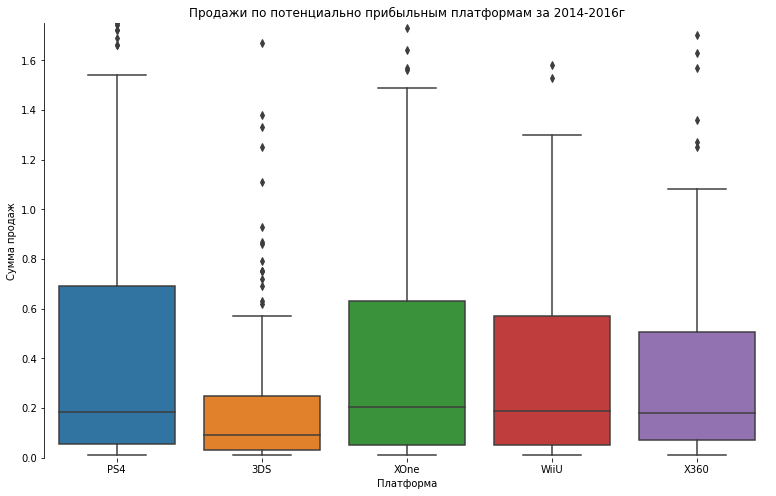

In [32]:
#для наглядности масштабируем ось y
plt.figure(figsize=(13,8))
sns.boxplot(data=platform_popular, x = 'platform', y = 'total_sales').set(ylim=(0, 1.75))
sns.despine(bottom=True)
plt.title('Продажи по потенциально прибыльным платформам за 2014-2016г')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

Из графика продаж по платформам видно, что на период 2014-2016г существует достаточно большое количество различных платформ, но далее, при детальной оценке каждой платформы, мы видим, что не все являются актуальными и растущими.
За этот период рост и большой объем продаж наблюдается у платформ PS4, 3DS, XOne, WiiU, X360.
При этом видим, что наибольшие медианные продажи наблюдаются только у 4-х платформ, которые мы и можем назвать потенциально прибыльными - это PS4, XOne, WiiU, X360.

### Исследование зависимости продаж от оценок

Для исследования зависимости продаж от оценок пользователей и критиков возьмем платформу PS3, хоть данная платформа и не является на данный момент потенциально прибыльно и уже изжила себя, она имеется максимальные продажи в периоде 2011-2016 и уже прошла весь жизненный цикл.

Корреляция
-0.16676141347662118


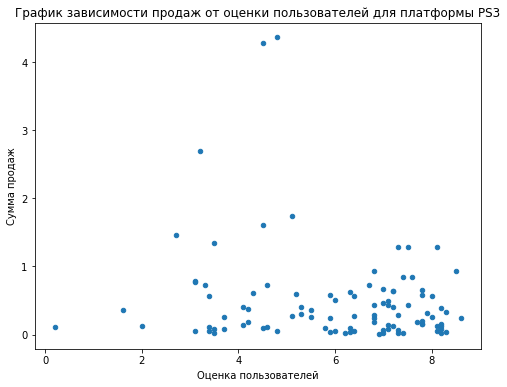

In [33]:
ps3_user_score = games_with2014.query('platform == "PS3" & user_score != -1')
ps3_user_score.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8,6))
plt.title('График зависимости продаж от оценки пользователей для платформы PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
print('Корреляция')
print(ps3_user_score['user_score'].corr(ps3_user_score['total_sales']))

Оценки пользователей демонстрируют отсутствие корреляции с продажами.

Корреляция
0.44657460493190704


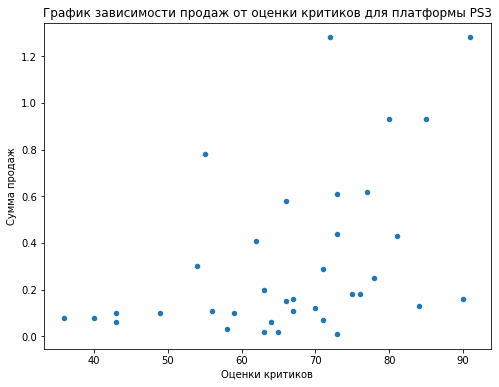

In [34]:
ps3_critic_score = games_with2014.query('platform == "PS3" & critic_score != -1')
ps3_critic_score.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8,6))
plt.title('График зависимости продаж от оценки критиков для платформы PS3')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')
print('Корреляция')
print(ps3_critic_score['critic_score'].corr(ps3_critic_score['total_sales']))

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж.

Корреляция для платформы PS4
-0.005040571535870943

Корреляция для платформы XOne
0.007395767292791306

Корреляция для платформы 3DS
0.2743689534161519

Корреляция для платформы X360
0.33651362483599345

Корреляция для платформы WiiU
0.34650122311934023

Корреляция для платформы PC
-0.06735643420635776

Корреляция для платформы PSV
0.04858251256520456

Корреляция для платформы Wii
nan

Корреляция для платформы PSP
nan



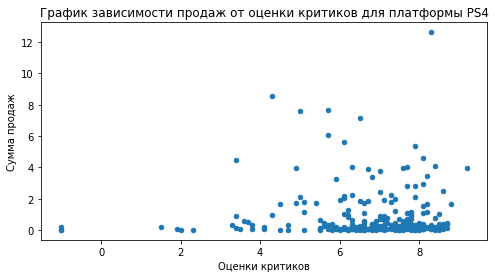

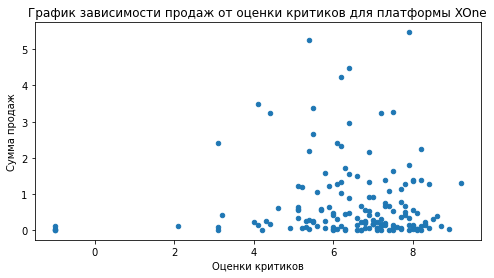

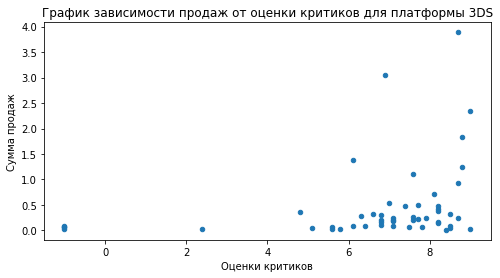

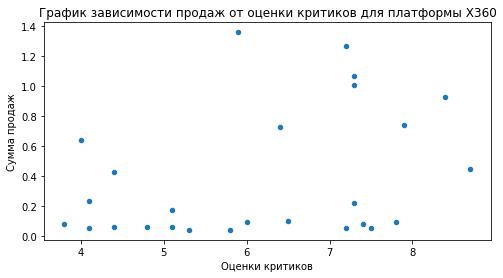

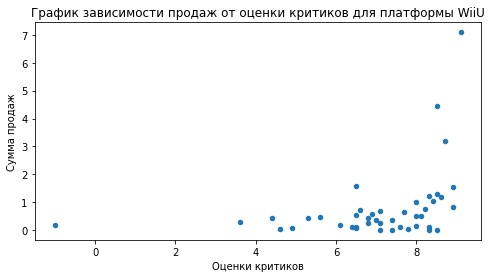

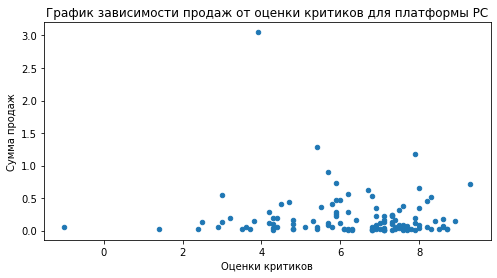

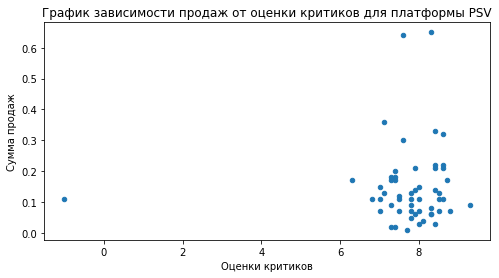

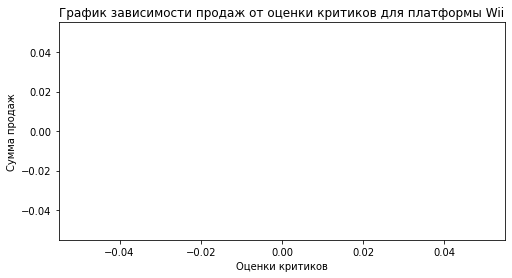

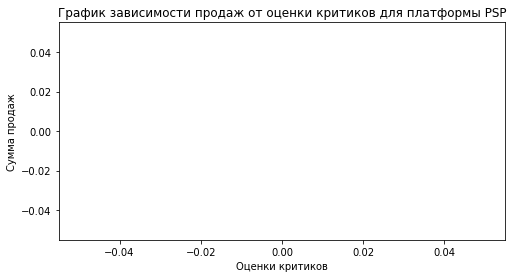

In [35]:
#корреляция продаж и оценок пользователей для других платформ
platform_total_new = platform_total.query('index != "PS3"')
for platform in platform_total_new.index:
    user = games_with2014.query('platform == @platform & critic_score != -1')
    print(f'Корреляция для платформы {platform}')
    print(user['user_score'].corr(user['total_sales']))
    user.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8,4))
    plt.title(f'График зависимости продаж от оценки критиков для платформы {platform}')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Сумма продаж')
    print()

Для платформ 3DS, X360, WiiU как мы видим прямую, средне-слабую корреляцию между оценками пользователей и продажами. Для платформ PS4, XOne, PS и PSV корреляция близится к 0. Также мы видим, что для платформ Wii и PSP расчитать корреляцию невозможно. Это говорит о том, что для данных платформ отсутствуют оценки пользователей за исследуемый нами период. Из графика продаж по платформам видно, что данные платформы имеют близкие к 0 продажи за период 2014-2016 г, в связи и игры на данных платформах не пользовались популярностью у пользователей.

Корреляция для платформы PS4
0.4026614106810409

Корреляция для платформы XOne
0.42867694370333226

Корреляция для платформы 3DS
0.314117492869051

Корреляция для платформы X360
0.5257228356581523

Корреляция для платформы WiiU
0.370201412480884

Корреляция для платформы PC
0.17463413769350036

Корреляция для платформы PSV
0.04266490657009526

Корреляция для платформы Wii
nan

Корреляция для платформы PSP
nan



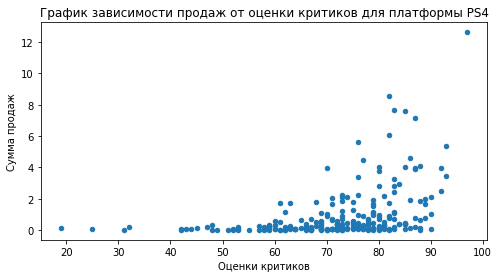

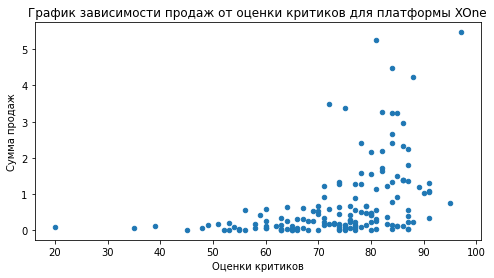

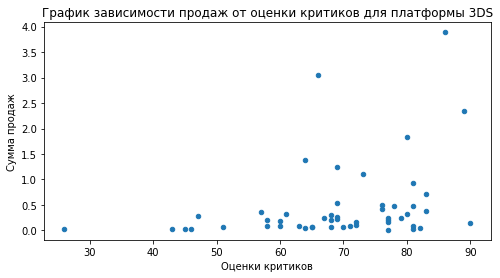

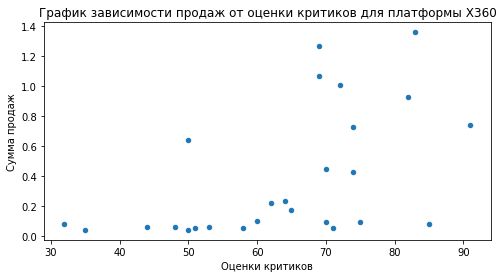

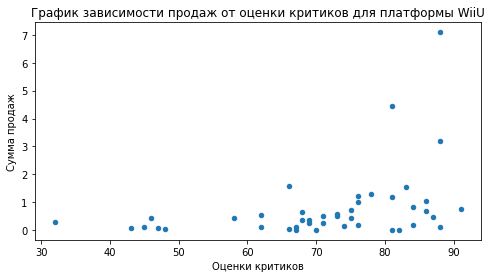

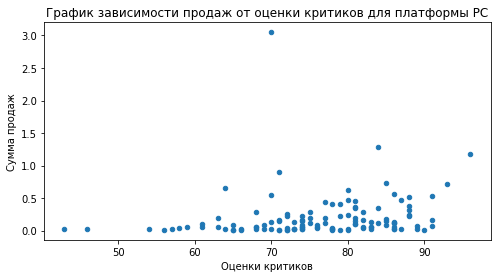

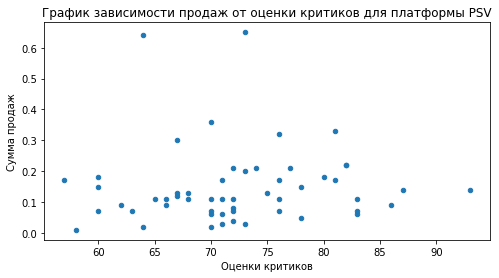

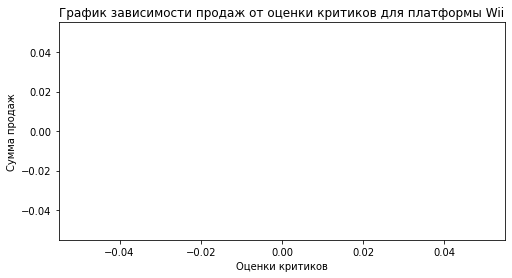

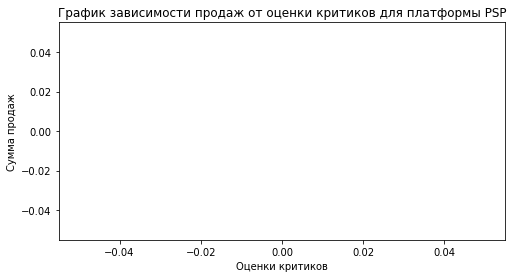

In [36]:
#корреляция продаж и оценок критиков для других платформ
for platform in platform_total_new.index:
    critic = games_with2014.query('platform == @platform & critic_score != -1')
    print(f'Корреляция для платформы {platform}')
    print(critic['critic_score'].corr(critic['total_sales']))
    critic.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8,4))
    plt.title(f'График зависимости продаж от оценки критиков для платформы {platform}')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Сумма продаж')
    print()
   

Для платформ PS4, XOne, 3DS, X360, WiiU как и для платформы PS3 мы видим прямую, средне-слабую корреляцию. Для платформ PS и PSV корреляция близится к 0. Также мы видим, что для платформ Wii и PSP расчитать корреляцию невозможно. Это говорит о том, что для данных платформ отсутствуют оценки критиков за исследуемый нами период. Из графика продаж по платформам видно, что данные платформы имеют близкие к 0 продажи за период 2014-2016 г, в связи с чем критикам данные игры были не интересны для оценки.

### Продажи по жанрам

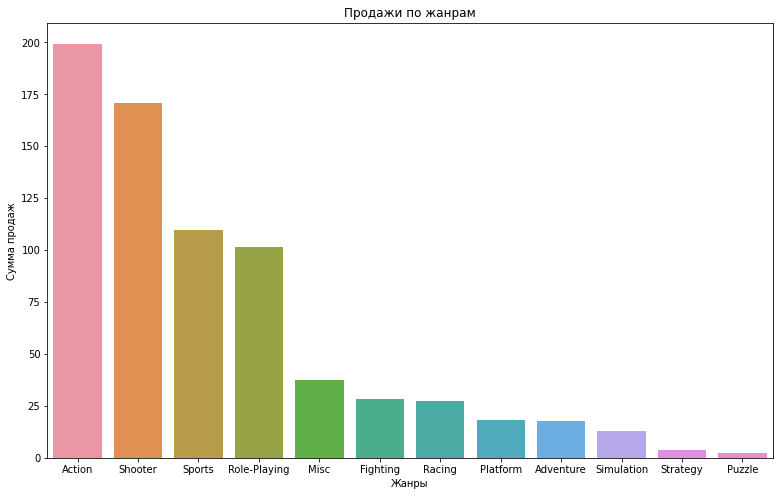

In [37]:
genre_total = games_with2014.pivot_table(index='genre', values='total_sales', 
                                            aggfunc=sum).sort_values(by='total_sales', ascending = False)
plt.figure(figsize=(13,8))
(sns.barplot(data=genre_total, x = genre_total.index, y = 'total_sales'))
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж')
plt.show()

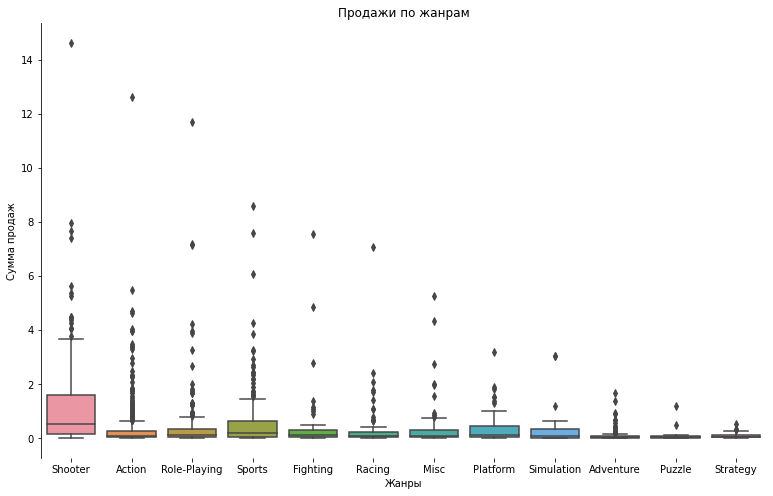

In [38]:
plt.figure(figsize=(13,8))
(sns.boxplot(data=games_with2014, x = 'genre', y = 'total_sales'))
sns.despine(bottom=True)
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж')
plt.show()

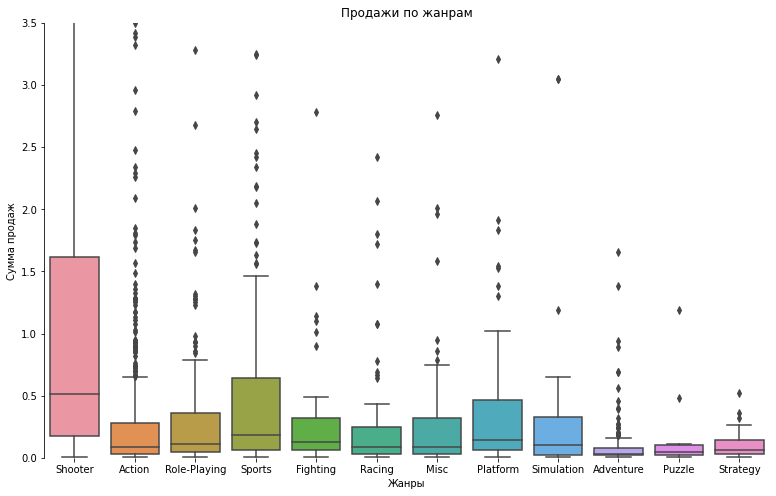

In [39]:
# для наглядности масштабируем ось у
plt.figure(figsize=(13,8))
sns.boxplot(data=games_with2014, x = 'genre', y = 'total_sales').set(ylim=(0, 3.5))
sns.despine(bottom=True)
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж')
plt.show()

Из полученных графиков видно, что наиболее прибыльными жанрами являются Action, Shooter, Role-Playing и Sport. Но при этом из графика "ящик с усами" мы видим, что жанр Action имеет много выбросов и маленькую медиану, что может говорить о суперприбылях по некоторым играм, но при этом в данном жанре выпускается огромное количество игр, продажи которых очень низкие. Наибольшие медианные значения и стабильные продажи имеют жанры Shooter, Platform и Sports.

## Портрет пользователя по регионам

### Популярные платформы

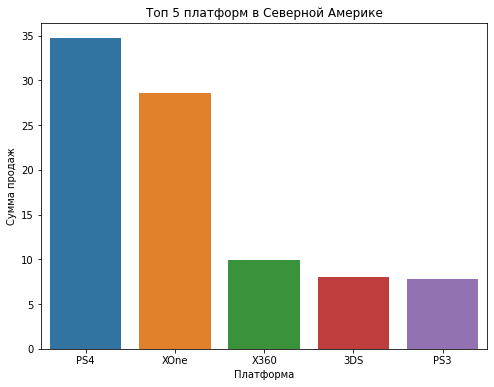

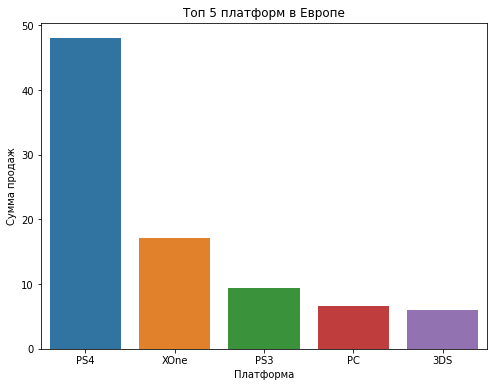

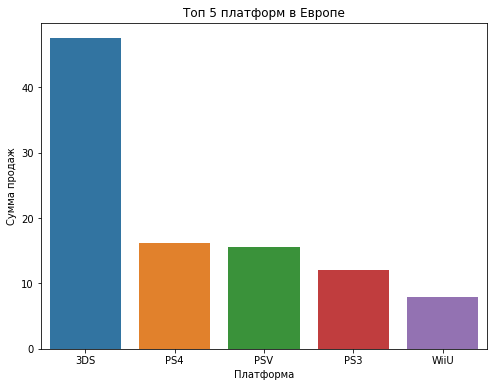

In [40]:
#расчет топ 5 платформ в Северной Америке, построение графика
na_platform = (
    games_with2014
    .pivot_table(index = 'platform', values = 'na_sales', aggfunc=sum)
    .sort_values(by='na_sales', ascending=False)
)
na_platform['share'] = (na_platform['na_sales']/sum(na_platform['na_sales']) * 100).round(2)
plt.figure(figsize=(8,6))
(sns.barplot(data=na_platform[0:5], x = na_platform[0:5].index, y = 'share'))
plt.title('Топ 5 платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()
#расчет топ 5 платформ в Европе, построение графика
eu_platform = (
    games_with2014
    .pivot_table(index = 'platform', values = 'eu_sales', aggfunc=sum)
    .sort_values(by='eu_sales', ascending=False)
)
eu_platform['share'] = (eu_platform['eu_sales']/sum(eu_platform['eu_sales']) * 100).round(2)
plt.figure(figsize=(8,6))
(sns.barplot(data=eu_platform[0:5], x = eu_platform[0:5].index, y = 'share'))
plt.title('Топ 5 платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()
#расчет топ 5 платформ в Европе, построение графика
jp_platform = (games_with2014
               .pivot_table(index = 'platform', values = 'jp_sales', aggfunc=sum)
               .sort_values(by='jp_sales', ascending=False)
              )
jp_platform['share'] = (jp_platform['jp_sales']/sum(jp_platform['jp_sales']) * 100).round(2)
plt.figure(figsize=(8,6))
(sns.barplot(data=jp_platform[0:5], x = jp_platform[0:5].index, y = 'share'))
plt.title('Топ 5 платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

Из полученных данных видно, что популярность платформ в различных регионах различается. При этом профиль пользователей Северной Америки и Европы в некотором роде похож. Наиболее популярными платформами в этих регионах являются PS3 и PS4, которые занимаю большую часть рынка. Но в Японии картина значительно отличается, наиболее популярной платформой здесь является 3DS, и она одна занимает значительную часть рынка.
Также видно, что топ-5 платформ занимаю 95% рынка.

### Популярные жанры

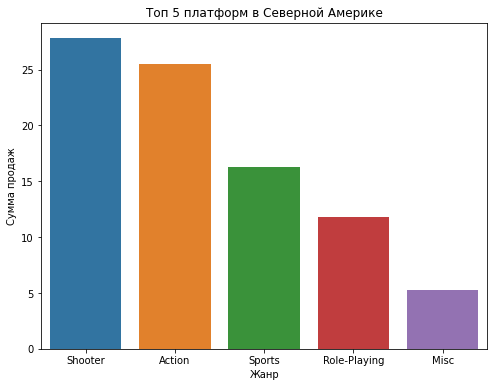

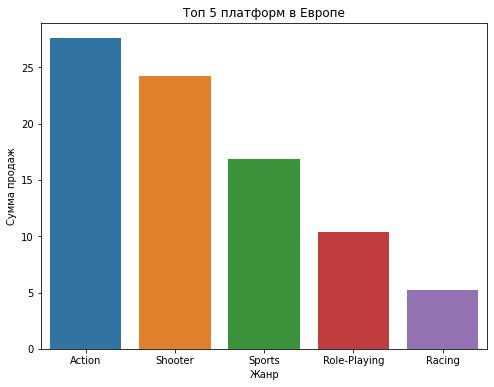

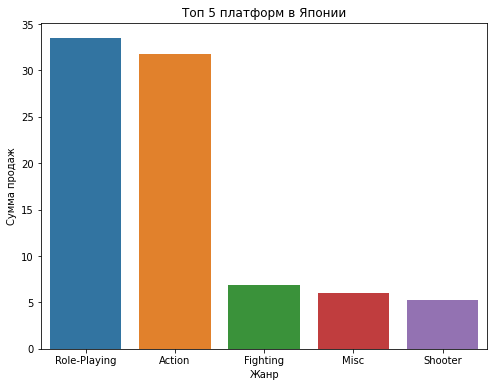

In [41]:
#расчет топ 5 жанров в Северной Америке, построение графика
na_genre = (
    games_with2014
    .pivot_table(index = 'genre', values = 'na_sales', aggfunc=sum)
    .sort_values(by='na_sales', ascending=False)
)
na_genre['share'] = (na_genre['na_sales']/sum(na_genre['na_sales']) * 100).round(2)
plt.figure(figsize=(8,6))
(sns.barplot(data=na_genre[0:5], x = na_genre[0:5].index, y = 'share'))
plt.title('Топ 5 платформ в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()
#расчет топ 5 жанров в Европе, построение графика
eu_genre = (
    games_with2014
    .pivot_table(index = 'genre', values = 'eu_sales', aggfunc=sum)
    .sort_values(by='eu_sales', ascending=False)
)
eu_genre['share'] = (eu_genre['eu_sales']/sum(eu_genre['eu_sales']) * 100).round(2)
plt.figure(figsize=(8,6))
(sns.barplot(data=eu_genre[0:5], x = eu_genre[0:5].index, y = 'share'))
plt.title('Топ 5 платформ в Европе')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()
#расчет топ 5 жанров в Японии, построение графика
jp_genre = (
    games_with2014
    .pivot_table(index = 'genre', values = 'jp_sales', aggfunc=sum)
    .sort_values(by='jp_sales', ascending=False)
)
jp_genre['share'] = (jp_genre['jp_sales']/sum(jp_genre['jp_sales']) * 100).round(2)
plt.figure(figsize=(8,6))
(sns.barplot(data=jp_genre[0:5], x = jp_genre[0:5].index, y = 'share'))
plt.title('Топ 5 платформ в Японии')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()

Из полученных данных видно для Северной Америки и Европы популярные жанры, как и их доли на рынке, совпадают. В Японии ситуация значительно отличается и, например, жанры Shooter и Sport не попадают в топ-5, хотя являются очень популярными в Северной Америке и Европе.
На продажи топ-5 популярных жанров приходится более 75% рынка для всех регионов.

### Влияние рейтинга на продажи

Топ 5 популярных жанров в Северной Америке:


,na_sales,share
rating,,
M,96.42,33.94
nd,64.72,22.78
E,50.74,17.86
T,38.95,13.71
E10+,33.23,11.70


Text(0, 0.5, 'Сумма продаж')

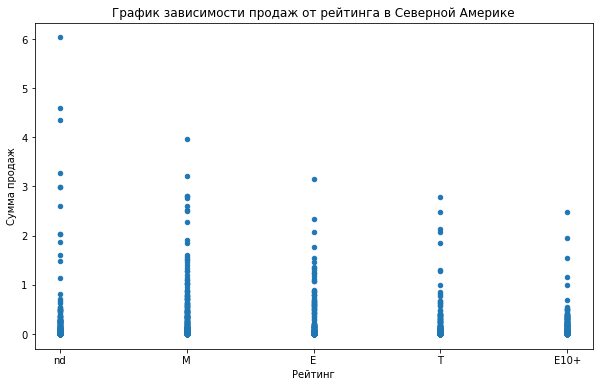

In [42]:
na_genre = (
    games_with2014
    .pivot_table(index = 'rating', values = 'na_sales', aggfunc=sum)
    .sort_values(by='na_sales', ascending=False)
    )
na_genre['share'] = (na_genre['na_sales']/sum(na_genre['na_sales']) * 100).round(2)
print('Топ 5 популярных жанров в Северной Америке:')
display(na_genre.head())
games_with2014.plot(x='rating', y='na_sales', kind='scatter', figsize=(10,6))
plt.title('График зависимости продаж от рейтинга в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')

Топ 5 популярных жанров в Европе:


,eu_sales,share
rating,,
M,93.44,34.52
nd,58.95,21.78
E,58.06,21.45
T,34.07,12.59
E10+,26.16,9.66


Text(0, 0.5, 'Сумма продаж')

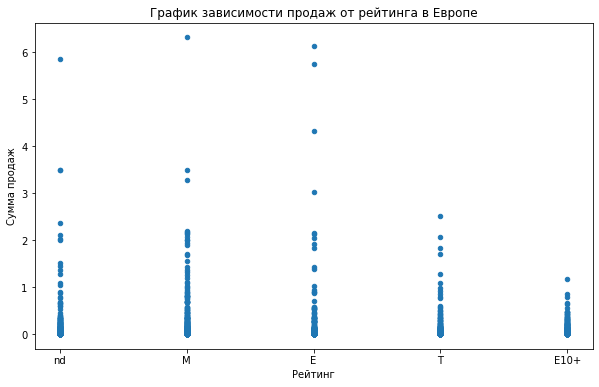

In [43]:
eu_genre = (
    games_with2014
    .pivot_table(index = 'rating', values = 'eu_sales', aggfunc=sum)
    .sort_values(by='eu_sales', ascending=False)
   )
eu_genre['share'] = (eu_genre['eu_sales']/sum(eu_genre['eu_sales']) * 100).round(2)
print('Топ 5 популярных жанров в Европе:')
display(eu_genre.head())
games_with2014.plot(x='rating', y='eu_sales', kind='scatter', figsize=(10,6))
plt.title('График зависимости продаж от рейтинга в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')

Топ 5 популярных жанров в Японии:


,jp_sales,share
rating,,
nd,56.90,61.12
T,14.78,15.88
E,8.94,9.60
M,8.01,8.60
E10+,4.46,4.79


Text(0, 0.5, 'Сумма продаж')

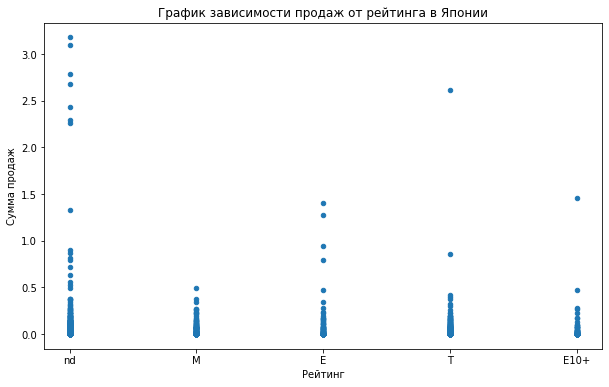

In [44]:
jp_genre = (
    games_with2014
    .pivot_table(index = 'rating', values = 'jp_sales', aggfunc=sum)
    .sort_values(by='jp_sales', ascending=False)
    )
jp_genre['share'] = (jp_genre['jp_sales']/sum(jp_genre['jp_sales']) * 100).round(2)
print('Топ 5 популярных жанров в Японии:')
display(jp_genre.head())
games_with2014.plot(x='rating', y='jp_sales', kind='scatter', figsize=(10,6))
plt.title('График зависимости продаж от рейтинга в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')

Из данных графиков видно, что рейтинги наиболее продаваемых игр для Европы и Северной Америки одинаковы, их доли на рынке также близки. Игры с рейтингом М являют топовыми, но данная ситуация не характерна для Японии.В Японии большую долю рынка занимают игры, с неизвестным нам рейтингом, а вот игры с рейтингом М имеют низкую популярность. Рейтинг игр, имеющийся в наших данных, предоставляется организацией ESRB, основная ее деятельность распространяется на Канаду и США. Так как в Японии наиболее популярной платформой является 3DS японского производства, следовательно игры для данной платформы разрабатываются так же в Японии и не поппадают под деятельность организации ESRB.

- <b>Усредненный портрет пользователя в Серверной Америке:</b> пользователь от 17 лет с платформой PS4 или XOne, играющий в игры жанра Action или Shooter;
- <b>Усредненный портрет пользователя в Европе:</b> пользователь от 17 лет с платформой PS4 или XOne, играющий в игры жанра Action или Shooter;
- <b>Усредненный портрет пользователя в Японии:</b> пользователь-подросток с платформой 3DS, играющий в игры жанра Role-Playing или Action;

## Проверка гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC

<b>Нулевая гипотеза:</b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
<b>Альтернативная гипотеза:</b> Средние пользовательские рейтинги платформ Xbox One и PC различаются;

In [45]:
xone = games_with2014.query('platform == "XOne" & user_score != -1')
pc = games_with2014.query('platform == "PC" & user_score != -1')

In [46]:
from scipy import stats as st
sample_1 = xone['user_score']
sample_2 = pc['user_score']
alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if  results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports

<b>Нулевая гипотеза:</b> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;

<b>Альтернативная гипотеза:</b> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [47]:
action = games_with2014.query('genre == "Action" & user_score != -1')
sports = games_with2014.query('genre == "Sports" & user_score != -1')

In [48]:
sample_1 = action['user_score']
sample_2 = sports['user_score']
alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if  results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

<b>Краткий обзор проведённой работы.</b> В ходе исследования были проанализированы таблицы с данными продажах игр за период с 1980 по 2016 г. Данные были приведены к корректному виду. В ходе исследований выявлен актуальный период для дальнейшего изучения и достижения цели проекта. Получена информация о наиболее популярных платформах и жанрах. Исследована зависимость продаж от оценок пользователей и критиков. Получены профили пользователей для регионов Северная Америка, Европа и Япония. В заключении были проверены гипотезы о пользовательских рейтингах платформ Xbox One и PC и жанров Action и Sports.

<b>Главные выводы.</b>

В среднем жизненный цикл платформы составляет около 10 лет. Наиболее популярными платформами на данный момент в глобальной выборке являются PS4, 3DS, XOne, WiiU. Но популярность платформы разнится для разных регионов, для Северной Америки и Европы наиболее популярными являются PS4 и XOne. Для Японии наиболее популярной платформой является 3DS.

Наиболее продаваемыми жанрами являются Action, Shooter, Role-Playing и Sport, при этом Shooter и Sports имеют наиболее стабильные продажи. Как и для плотформ профили пользователей Северной Америки и Европы очень похожи, в этих регионах популярными жанрами являются Action и Shooter. Картина в Японии вновь отличается среди пользователей дынного региона популярным жанром является Role-Playing и Action.

Продажи игр также зависят от рейтинга игры. В Европе и Северной Америке наиболее продаваем игры с рейтингом М, для Японии, к сожалению, точно выяснить наиболее популярный рейтинг из полученных данных нет возможности, так как болле 60% рынка приходится на игры с неизветным нам рейтингом. А вот на втором месте идут продажи игр с рейтингом T.

Так же мы выяснили, что для платформ PS4, XOne, 3DS, X360, WiiU как и для платформы PS3 имеется прямая, средне-слабую корреляция между продажами и оценками критиков. Для платформ PS и PSV такая корреляция близится к 0.
Для платформ 3DS, X360, WiiU как мы видим прямую, средне-слабую корреляцию между оценками пользователей и продажами. Для платформ PS4, XOne, PS и PSV корреляция близится к 0. 

В завершении можно сказать, что средние пользовательские рейтинги платформ PS и XOne одинаковые, а средние пользовательские рейтинги жанров Action и Sports различаются.